# Assignment 03

## Plotting the input data

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


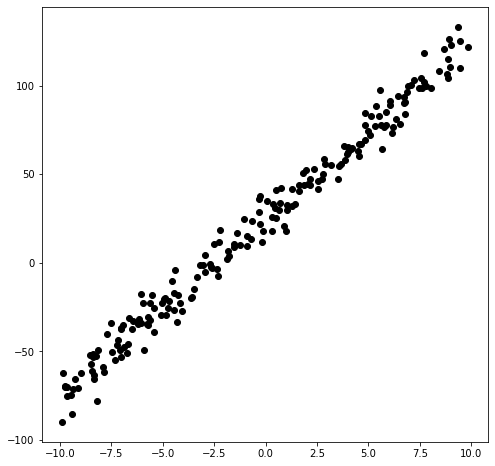

In [1]:
!pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, :1]
y_data = data[:, 1:]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.show()

In [2]:
from tqdm import tqdm

class Linear:
    r'''Linear model for linear regression'''
    weight = np.asarray([-30])
    bias = np.asarray([-30])

    def __call__(self, x: np.ndarray):
        return self.weight * x + self.bias
    
def MSELoss(pred: np.ndarray, label: np.ndarray):
    return ((pred - label) ** 2).mean()/2

epoch = 10000
learning_rate = 1e-3

model = Linear()

losses = []
weights = []
biases = []


for step in tqdm(range(1, epoch+ 1)):
    # MSELoss
    loss: np.ndarray = MSELoss(model(x_data), y_data)
        
    # Backpropagation Loss
    d_bias = (model(x_data) - y_data).mean()
    d_weight = ((model(x_data) - y_data) * x_data).mean()
    
    # Gradient Descent Algorithm
    temp_bias = model.bias - learning_rate * d_bias
    temp_weight = model.weight - learning_rate * d_weight
    
    # Update parameter
    model.bias = temp_bias
    model.weight = temp_weight

    losses += [loss.item()]
    weights += [model.weight.item()]
    biases += [model.bias.item()]
    
losses = np.asarray(losses)
weights = np.asarray(weights)
biases = np.asarray(biases)


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 24696.36it/s]


## linear regression result

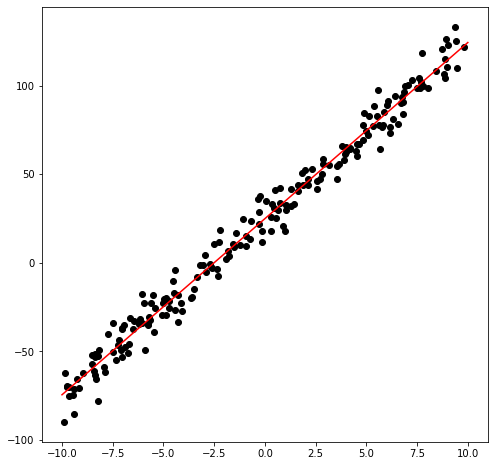

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.plot([-10, 10], model.bias + model.weight * [-10, 10], 'r')
plt.show()